In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

## Tail Bounds ##

If you know $E(X)$ and $SD(X)$ you can get some idea of how much probability there is in the tails of the distribution of $X$. 

In this section we are going to get upper bounds on probabilities such as the gold area in the graph below. That's $P(X \ge 20)$ for the random variable $X$ whose distribution is displayed in the histogram.

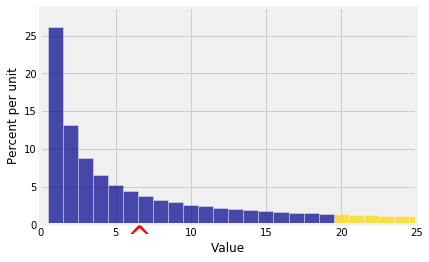

In [2]:
# HIDDEN
x = np.arange(1, 26)
probs = (1/x)/sum(1/x)
dist = Table().values(x).probability(probs)
Plot(dist, event=np.arange(20, 26), show_ev=True)
plt.xlim(0, 25);

### Monotonicity ###
To do this, we will start with an observation about expectations of functions of $X$.

Suppose $g$ and $h$ are functions such that $g(X) \ge h(X)$, that is, $P(g(X) \ge h(X)) = 1$. Then $E(g(X)) \ge E(h(X))$.

This result is apparent when you notice that for all $\omega$ in the outcome space,
$$
(g \circ X)(\omega) \ge (h \circ X)(\omega) ~~~~ \text{and therefore} ~~~~
(g \circ X)(\omega)P(\omega) \ge (h \circ X)(\omega)P(\omega)
$$

Now suppose $X$ is a non-negative random variable, and let $c$ be a positive number. Consider the two functions $g$ and $h$ graphed below.

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


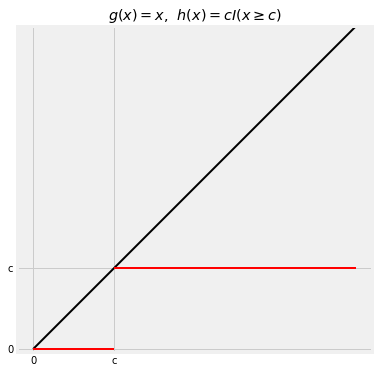

In [3]:
# HIDDEN
plt.figure(figsize=(6,6))
plt.plot([0, 20], [0, 20], lw=2, color='k')
plt.plot([0, 5], [0, 0], lw=2, color='r')
plt.plot([5, 20], [5, 5], lw=2, color='r')
plt.ylim(-0.2, 20)
plt.xticks([0, 5], [0, 'c'])
plt.yticks([0, 5], [0, 'c']);
plt.axes().set_aspect('equal')
plt.title('$g(x) = x$,  $h(x)=cI(x \geq c)$');

The function $g$ is the identity $g(x) = x$ for all $x$. It leaves $x$ unchanged. So $E(g(X)) = E(X)$.

The function $h$ truncates $x$ at $c$ as follows: if $x < c$ then $h(x) = 0$, and if $x \ge c$ then $h(x) = c$. So $E(h(X)) = E(cI(X \ge c)) = cP(X \ge c)$.

Clearly $g \ge h$, and so

$$
E(X) ~ = ~ E(g(X)) ~ \ge ~ E(h(X)) ~ =  ~ cP(X \ge c)
$$

We have just proved

### Markov's Inequality ###
Let $X$ be a non-negative random variable. Then for any $c > 0$, 
$$
P(X \ge c) ~ \le ~ \frac{E(X)}{c}
$$

This result is called a "tail bound" because it puts an upper limit on how big the right tail at $c$ can be. It is worth noting that $P(X > c) \le P(X \ge c) \le E(X)/c$ by Markov's bound.

In the figure below, $E(X) = 6.5$ and $c = 20$. Markov's inequality says that the gold area is *at most*
$$
\frac{6.5}{20} = 0.325
$$
You can see that the bound is pretty crude. The gold area is clearly quite a bit less than 0.325.

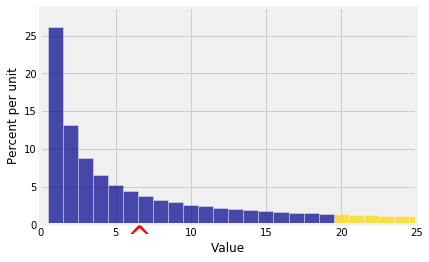

In [4]:
# HIDDEN
x = np.arange(1, 26)
probs = (1/x)/sum(1/x)
dist = Table().values(x).probability(probs)
Plot(dist, event=np.arange(20, 26), show_ev=True)
plt.xlim(0, 25);

Another way to think of Markov's bound is that if $X$ is a non-negative random variable then

$$
P(X \ge k\mu_X) ~ \le ~ \frac{1}{k} ~~~ \text{for all } k > 0
$$

That is, $P(X \ge 2\mu_X) \le 1/2$, $P(X \ge 5\mu_X) \le 1/5$, and so on. The chance that a non-negative random variable is at least $k$ times the mean is at most $1/k$.

Notes:
- $k$ need not be an integer. For example, the chance that a non-negative random variable is at least 3.8 times the mean is at most $1/3.8$.
- If $k \le 1$, the inequality doesn't tell you anything you didn't already know. If $k \le 1$ then Markov's bound is 1 or greater. All probabilities are bounded above by 1, so the inequality is true but useless for $k \le 1$. 
- When $k$ is large, the bound does tell you something. You are looking at a probability quite far out in the tail of the distribution, and Markov's bound is $1/k$ which is small.

### Chebyshev's Inequality ###
Markov's bound only uses $E(X)$, not $SD(X)$. To get bounds on tails it seems better to use $SD(X)$ if we can. *Chebyshev's Inequality* does just that. It provides a bound on the two tails outside an interval that is symmetric about $E(X)$ as in the following graph.

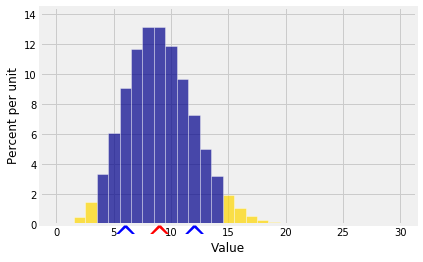

In [5]:
# HIDDEN
x = np.arange(31)
poi = stats.poisson.pmf(x, 9)
dist2 = Table().values(x).probability(poi)
Plot(dist2, event=np.append(np.arange(4), np.arange(15, 31, 1)), show_ev=True, show_sd=True)

The red arrow marks $\mu_X$ as usual, and now the two blue arrows are at a distance of $SD(X)$ on either side of the mean. It is often going to be convenient to think of $E(X)$ as "the origin" and to measure distances in units of SDs on either side.

Thus we can think of the gold area as the probability that $X$ is at least $z$ SDs away from $\mu_X$, for some positive $z$. Now

\begin{align*}
P\big{(}|X - \mu_X| \ge z\sigma_X\big{)} &= P\big{(}(X-\mu_X)^2 \ge z^2\sigma_X^2\big{)} \\ \\
&\le \frac{E\big{[}(X-\mu_X)^2\big{]}}{z^2\sigma_X^2} ~~~~~ \text{(Markov's Inequality)}\\ \\
&= \frac{\sigma_X^2}{z^2\sigma_X^2} ~~~~~ \text{(definition of variance)} \\ \\
&= \frac{1}{z^2}
\end{align*}

Chebyshev's Inequality makes no assumptions about the shape of the distribution. It implies that no matter what the distribution of $X$ looks like,

- $P(\mu_X - 2\sigma_X < X < \mu_X + 2\sigma_X) > 1 - 1/4 = 75\%$

- $P(\mu_X - 3\sigma_X < X < \mu_X + 3\sigma_X) > 1 - 1/9 = 88.88...\%$
- $P(\mu_X - 4\sigma_X < X < \mu_X + 4\sigma_X) > 1 - 1/16 = 93.75\%$
- $P(\mu_X - 5\sigma_X < X < \mu_X + 5\sigma_X) > 1 - 1/25 = 96\%$

That is, *no matter what the shape of the distribution*, the bulk of the probability is in the interval "expected value plus or minus a few SDs".

This is one reason why the SD is a good measure of spread. No matter what the distribution, if you know the expectation and the SD then you have a pretty good sense of where the bulk of the probability is located. 

If you happen to know more about the distribution then of course you can do better than Chebyshev's bound. But in general Chebyshev's bound is as well as you can do without making further assumptions.

### Standard Units ###
To formalize the notion of "setting $\mu_X$ as the origin and measuring distances in units of $\sigma_X$, we define a random variable $Z$ called "$X$ in standard units" as follows:

$$
Z = \frac{X - \mu_X}{\sigma_X}
$$

$Z$ measures how far $X$ is above its mean, relative to its SD. In other words, $X$ is $Z$ SDs above the mean:

$$
X = Z\sigma_X + \mu_X
$$

It is important to learn to go back and forth between these two scales of measurement, as we will be using standard units quite frequently. Note that by the linear function rules,

$$
E(Z) = 0 ~~~~ \text{and} ~~~~ SD(Z) = 1
$$

no matter what the distribution of $X$ is.

Chebyshev's Inequality says

$$
P(|X - \mu_X| > z\sigma_X) \le \frac{1}{z^2}
$$

which is the same as saying

$$
P(|Z| \ge z) \le \frac{1}{z^2}
$$

So if you have converted a random variable to standard units, the overwhelming majority of the values of the standardized variable should be in the range $-5$ to $5$. It is possible that there are values outside that range, but it is not likely.

### Another Way of Writing Chebyshev's Inequality ###
Chebyshev's Inequality is often written as follows:

For all $c > 0$,
$$
P\big{(}|X - \mu_X| \ge c \big{)} ~ \le ~ \frac{\sigma_X^2}{c^2}
$$

This is the same as our statement but with $c$ replacing $z\sigma_X$. We will use whichever form happens to be convenient in a given setting.